In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("rev_Binance_BTCUSDT_d.csv").fillna(0)
df.head()

,unix,date,time,symbol,open,high,low,close,Volume,BTC,Volume.1,USDT,tradecount
0,1502928000,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,0.0,0.0,0.0,0.0
1,1503014400,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,0.0,0.0,0.0,0.0
2,1503100800,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,0.0,0.0,0.0,0.0
3,1503187200,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,0.0,0.0,0.0,0.0
4,1503273600,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,0.0,0.0,0.0,0.0


In [50]:
print(df.head())
print(df.shape)
print(df.columns)

         unix        date      time   symbol  ...  BTC  Volume.1  USDT  tradecount
0  1502928000  2017-08-17  BTC/USDT  4469.93  ...  0.0       0.0   0.0         0.0
1  1503014400  2017-08-18  BTC/USDT  4285.08  ...  0.0       0.0   0.0         0.0
2  1503100800  2017-08-19  BTC/USDT  4108.37  ...  0.0       0.0   0.0         0.0
3  1503187200  2017-08-20  BTC/USDT  4139.98  ...  0.0       0.0   0.0         0.0
4  1503273600  2017-08-21  BTC/USDT  4086.29  ...  0.0       0.0   0.0         0.0

[5 rows x 13 columns]
(1300, 13)
Index(['unix', 'date', 'time', 'symbol', 'open', 'high', 'low', 'close',
       'Volume', 'BTC', 'Volume.1', 'USDT', 'tradecount'],
      dtype='object')


Text(0.5, 1.0, 'Cumulative Returns')

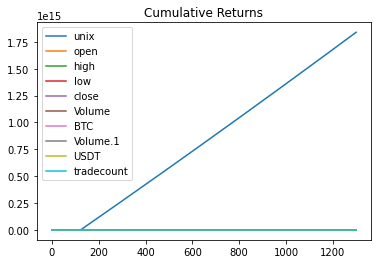

In [51]:
dr = df.cumsum()
dr.plot()
plt.title('Cumulative Returns')

Text(0.5, 1.0, 'Autocorrelation plot')

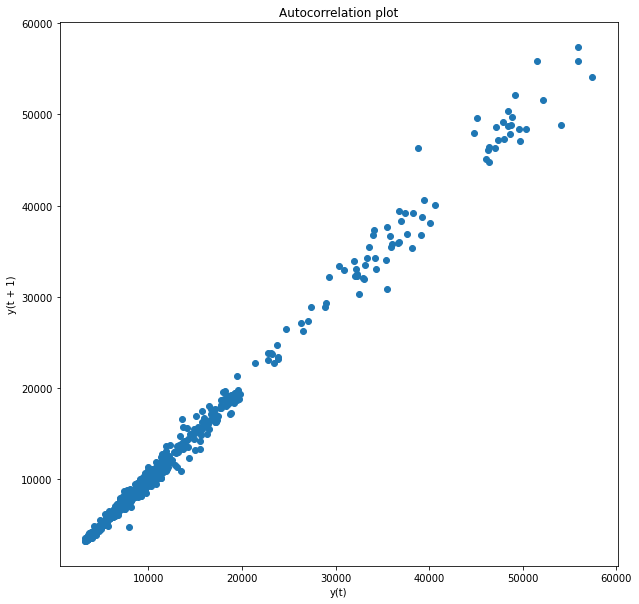

In [52]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=1)
plt.title('Autocorrelation plot')

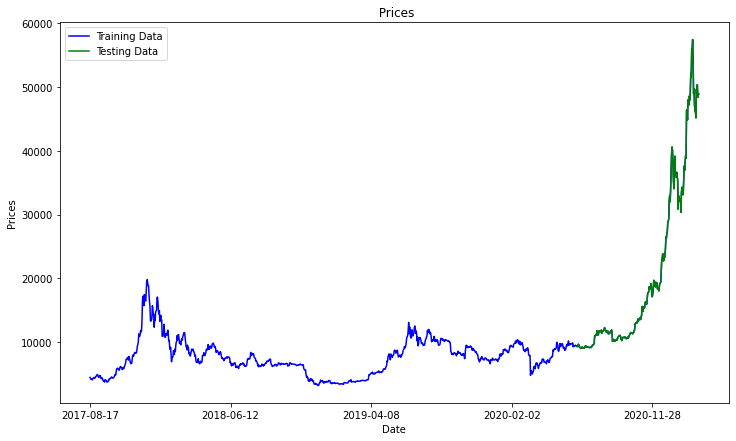

In [54]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(' Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(df['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1299, 300), df['date'][0:1299:300])
plt.legend()

In [17]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [57]:
train_ar = train_data['open'].values
test_ar = test_data['open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
# print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Symmetric mean absolute percentage error: 56.815


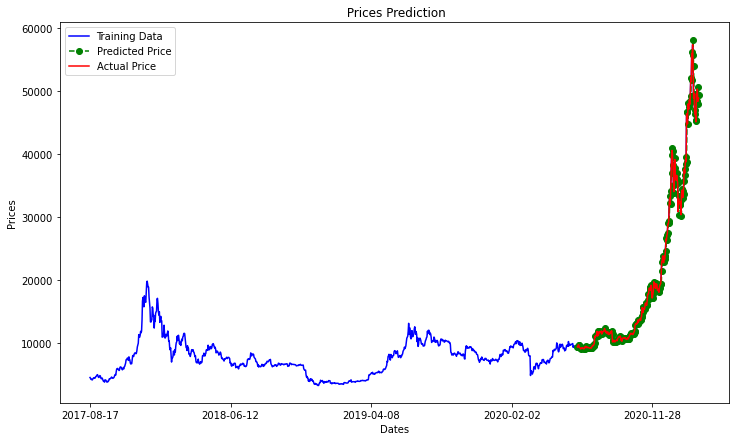

In [55]:
plt.figure(figsize=(12,7))
plt.plot(df['open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.title(' Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1299, 300), df['date'][0:1299:300])
plt.legend()

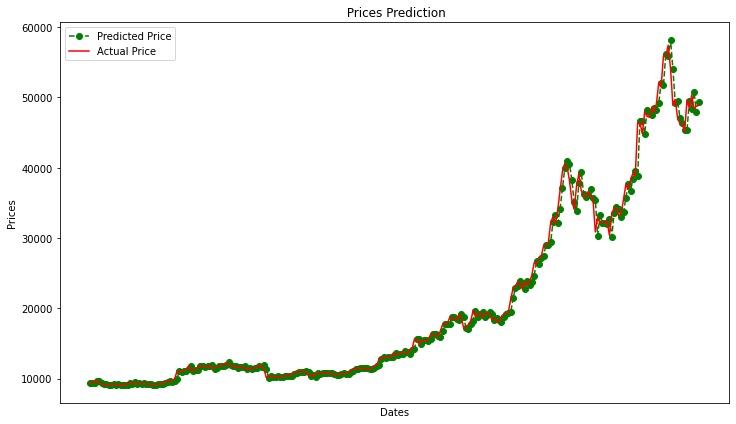

In [56]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.legend()
plt.title(' Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(1486,1299, 60), df['date'][1486:1299:60])
plt.legend()

References: https://towardsdatascience.com/stock-market-analysis-using-arima-8731ded2447a